# Final Project

This is your final project. It accounts for maximum 20% of the final grade.

**Instructions**
* You should work on this project either **individually**
* This project will be partially **auto-graded** and partially **manually graded**: the auto-grading will check that your answers to the question is correct (or close to be correct) and the manual grading will check your python coding and visualization style. **If your submission fails the auto-grade, you will get 0.** 

**Note**
* Write your code after you see `# YOUR CODE HERE` 
* Read the instruction of each question. You have a **limited time to submit: Date Time**. Only your last submission counts.
* Copying the solution of other student is forbidden.
* For each example, the symbol `->` indicates the value the function should return.
* After the deadline, submission is only possible by email attachment (.ipynb file) to your TA and cc your instructor. Late submission will be penalized (up to 100%, if late > 72 hours).

**Project Description**

This data set `CardioGoodFitness.csv` is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables `Product`, `Age`, `Gender`, `Education`, `MaritalStatus`, `Usage`, `Fitness`, `Income`, and `Miles`. 

* `Product`: the model of the treadmill

* `Age`: in number of years, of the customer

* `Gender`: of the customer

* `Education`: in number of years, of the customer

* `MaritalStatus`: of the customer

* `Usage`: average number of times the customer wants to use the treadmill per week

* `Fitness`: self rated fitness score of the customer (5 - very fit, 1 - very unfit)

* `Income`: of the customer

* `Miles`: expected to run



To understand products, your project focuses on the following two parts:
1. Process and analyze the data 
2. Create visualizations



**Guidelines**
* You will read instructions and hints carefully and apply your best judgement to answer the questions.
* For each question, you need to write Python codes to answer and you need to assign the value to a variable.
* For Part 1, you need to store your answers in the `answers` dictionary with keys "1", "2", "3", ... "10" and corresponding values (the answer to each question).

In [1]:
# You will need to import these two packages.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
import seaborn as sns

In [2]:
data = pd.read_csv("CardioGoodFitness.csv")

## Questions (50 points)

Run preliminary data analysis on the dataset to answer the following questions:

1.What is the average income of customers in the dataset?

2.Which gender has a higher median fitness level?

3.What is the standard deviation of treadmill usage per week among customers?

4.What is the average age of customers for each product type?

5.What is the range (maximum - minimum) of miles expected to run by customers?

6.How many customers use the treadmill 5 or more times per week?

7.What percentage of Male customers have an income greater than $75,000?

8.What percentage of customers are older than 50 years (in float, e.g., 0.15)?

9.What is the minimum number of miles expected to be run by a Female customer?

10.What is the most common income bracket (e.g., ‘$0-$30,000', '$30,001-$50,000', '$50,001-$70,000', '$70,001-$90,000', '$90,001-$110,000', '$110,000+') in the dataset?

(optional)11.What conditions do these characteristics need to meet in order to get a customer to buy a model C?

(optional)12.Based on the rules you have summarized, generate a function that predicts the type of product customers will buy.


Write all your answers in a dictionary named `answers`. This dictionary has keys `"1", "2", "3", ... "10"` and values `a1, a2, a3, ... a10` respectively. (e.g., a1 is the variable storing the answer to question 1)

In [3]:
# 1.What is the average income of customers in the dataset?

### BEGIN SOLUTION
average_income = data['Income'].mean()
a1 = average_income
print("Average Income:", a1)
### END SOLUTION

Average Income: 76337.845


In [4]:
# 2.Which gender has a higher median fitness level?

### BEGIN SOLUTION
median_fitness_by_gender = data.groupby('Gender')['Fitness'].median()
a2 = median_fitness_by_gender
print("Median Fitness by Gender:", a2)
### END SOLUTION

Median Fitness by Gender: Gender
Female    3.0
Male      3.0
Name: Fitness, dtype: float64


In [5]:
# 3.What is the standard deviation of treadmill usage per week among customers?

### BEGIN SOLUTION
std_usage = data['Usage'].std()
a3 = std_usage
print("Standard Deviation of Usage:", a3)
### END SOLUTION

Standard Deviation of Usage: 1.95280367959897


In [6]:
# 4.What is the average age of customers for each product type?
### BEGIN SOLUTION
average_age_by_product = data.groupby('Product')['Age'].mean()
a4 = average_age_by_product
print("Average Age by Product:", a4)
### END SOLUTION

Average Age by Product: Product
ModelA    41.285714
ModelB    42.557143
ModelC    42.925373
Name: Age, dtype: float64


In [7]:
# 5.What is the range (maximum - minimum) of miles expected to run by customers?

### BEGIN SOLUTION
miles_range = data['Miles'].max() - data['Miles'].min()
a5 = miles_range
print("Miles Range:", a5)
### END SOLUTION

Miles Range: 250


In [8]:
# 6.How many customers use the treadmill 5 or more times per week?

### BEGIN SOLUTION
customers_usage_5_or_more = data[data['Usage'] >= 5].shape[0]
a6 = customers_usage_5_or_more
print("Customers Usage 5+ Times/Week:", a6)
### END SOLUTION

Customers Usage 5+ Times/Week: 84


In [9]:
### BEGIN SOLUTION

# First, calculate the total number of male customers
total_male_customers = data[data['Gender'] == 'Male'].shape[0]

if total_male_customers > 0:
    # If there are male customers, calculate the number of male customers with an income greater than $75,000
    male_high_income_count = data[(data['Gender'] == 'Male') & (data['Income'] > 75000)].shape[0]
    # Calculate the percentage
    male_high_income_percentage = male_high_income_count / total_male_customers
    a7 = male_high_income_percentage
    print("Percentage of Male with Income > $75,000:", male_high_income_percentage)
else:
    # If there are no male customers, output 0 or a corresponding message
    print("No male customers available for analysis.")
    a7 = "No male customers available for analysis."
### END SOLUTION

Percentage of Male with Income > $75,000: 0.49523809523809526


In [10]:
# 8.What percentage of customers are older than 50 years (in float, e.g., 0.15)?

### BEGIN SOLUTION
### BEGIN SOLUTION

# Check whether the data set is empty
if data.shape[0] > 0:
    # Calculate the proportion of customers over the age of 50
    older_than_50_percentage = data[data['Age'] > 50].shape[0] / data.shape[0]
    # Format the output percentage, keeping two decimals
    print(f"Percentage of Customers Older than 50: {older_than_50_percentage*100:.2f}%")
    a8 = round(older_than_50_percentage*100, 2)
else:
    # 如果数据集为空，输出提示信息
    print("No data available.")
    a8 = "No data available."
### END SOLUTION
### END SOLUTION

Percentage of Customers Older than 50: 32.50%


In [11]:
# 9.What is the minimum number of miles expected to be run by a Female customer?

### BEGIN SOLUTION
female_data = data[data['Gender'] == 'Female']
min_miles_female = female_data['Miles'].min()
a9 = min_miles_female
print(f"The minimum number of miles expected to be run by a Female customer is:", a9)
### END SOLUTION

The minimum number of miles expected to be run by a Female customer is: 52


In [12]:
# 10.What is the most common income bracket (e.g., ‘$0-$30,000', '$30,001-$50,000', '$50,001-$70,000', '$70,001-$90,000', '$90,001-$110,000', '$110,000+') in the dataset?

### BEGIN SOLUTION
income_brackets = [0, 30000, 50000, 70000, 90000, 110000, float('inf')]
income_bracket_labels = ['$0-$30,000', '$30,001-$50,000', '$50,001-$70,000', '$70,001-$90,000', '$90,001-$110,000', '$110,000+']
data['IncomeBracket'] = pd.cut(data['Income'], bins=income_brackets, labels=income_bracket_labels, right=False)
income_frequency = data['IncomeBracket'].value_counts()
most_common_bracket = income_frequency.idxmax()
most_common_count = income_frequency.max()
a10 = most_common_bracket
print(f"The most common income bracket is: {most_common_bracket} with {most_common_count} occurrences.")
### END SOLUTION

The most common income bracket is: $50,001-$70,000 with 52 occurrences.


Model accuracy on the validation set: 0.23


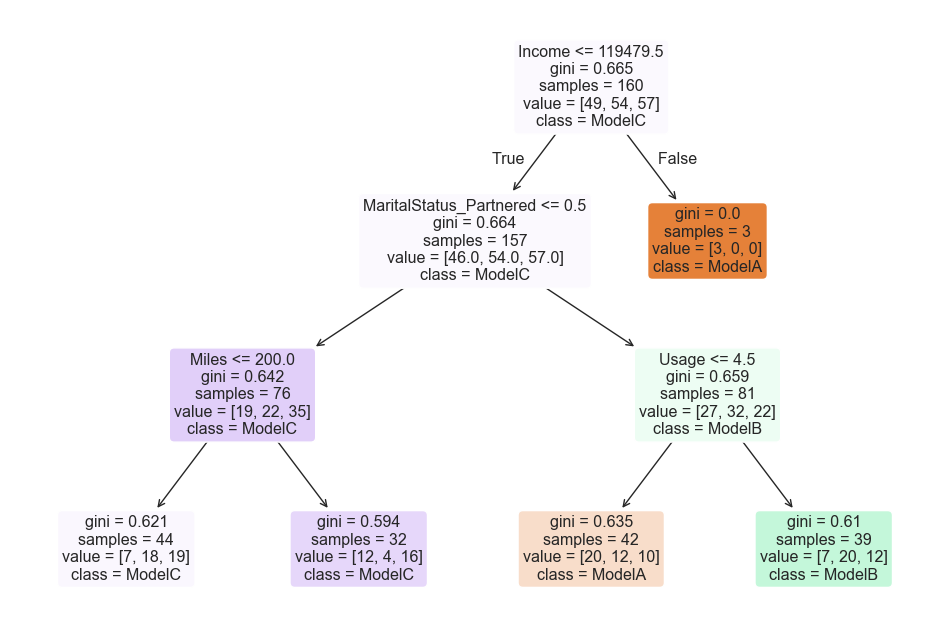

Therefore, we can conclude that customers who purchase Model C exhibit the following characteristics.：Income <= 119479.5 AND MaritalStatus_Partnered <= 0.5 


In [13]:
# (optional)11. What conditions do these characteristics need to meet in order to get a customer to buy a model C?

### BEGIN SOLUTION
# Data preprocessing (assuming 'Product' is the target variable)
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from IPython.display import display

# Load the training dataset
data_train = pd.read_csv("CardioGoodFitness.csv")

# Data preprocessing (assume 'Product' is the target variable)
X = data_train.drop("Product", axis=1)  # Remove the target column, leaving only features
y = data_train["Product"]  # Extract the target column

# Check if features are numeric; if not, perform one-hot encoding
if not all([pd.api.types.is_numeric_dtype(X[col]) for col in X.columns]):
    X = pd.get_dummies(X)

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)  # Transform the target variable into numeric

# Split the dataset into training and validation sets (8:2 ratio)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Evaluate model performance using the validation set
y_valid_pred = clf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_valid_pred)

# Output the model accuracy on the validation set
print(f"Model accuracy on the validation set: {accuracy:.2f}")

# Generate the decision tree plot
def plot_decision_tree(clf, feature_names, class_names):
    plt.figure(figsize=(12, 8))
    plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
    plt.show()

# Plot the decision tree
plot_decision_tree(clf, X_train.columns, le.classes_)
print("Therefore, we can conclude that customers who purchase Model C exhibit the following characteristics.：Income <= 119479.5 AND MaritalStatus_Partnered <= 0.5 ")

### END SOLUTION

In [14]:
# (optional)12. Based on the rules you have summarized, generate a function that predicts the type of product customers will buy.

### BEGIN SOLUTION
# Prediction model function
# Generate a summary of rules (based on manually defined rules)
rules_data = [
    {"Model": "ModelA", "Conditions": "Income <= 119479.5 AND MaritalStatus_Partnered > 0.5 AND Usage <= 4.5"},
    {"Model": "ModelA", "Conditions": "Income > 119479.5"},
    {"Model": "ModelB", "Conditions": "Income <= 119479.5 AND MaritalStatus_Partnered > 0.5 AND Usage > 4.5"},
    {"Model": "ModelC", "Conditions": "Income <= 119479.5 AND MaritalStatus_Partnered <= 0.5 "}
]

# Convert to a DataFrame
rules_df = pd.DataFrame(rules_data)

# Set display options to avoid line wrapping
pd.set_option('display.colheader_justify', 'center')  # Center the column headers
pd.set_option('display.width', 1000)                 # Increase display width
pd.set_option('display.max_colwidth', None)          # Ensure complete display of column contents

# Display the rules as a table
display(rules_df)
feature_summary = rules_df.to_string(index=False)
print(feature_summary)

# Prediction model function
def predict_model(input_data):
    # Check if the input data is a DataFrame
    if isinstance(input_data, pd.DataFrame):
        # Perform one-hot encoding if there are non-numeric features
        if not all([pd.api.types.is_numeric_dtype(input_data[col]) for col in input_data.columns]):
            input_data = pd.get_dummies(input_data)
        
        # Fill missing columns to match the training data
        missing_cols = set(X_train.columns) - set(input_data.columns)
        for col in missing_cols:
            input_data[col] = 0
        
        # Ensure the column order is consistent
        input_data = input_data[X_train.columns]
        
        # Perform predictions
        predictions = clf.predict(input_data)
        predicted_labels = le.inverse_transform(predictions)
        return predicted_labels
    else:
        return "Input data must be in DataFrame format"

# Load prediction data and call the prediction function
data_predict = pd.read_excel("Cardio_10.xlsx")
predicted_model = predict_model(data_predict)

# Display prediction results
predicted_results = pd.DataFrame(predicted_model, columns=["Predicted Model"])
display(predicted_results)
predicted_results = predicted_results.to_string(index=False)
print(predicted_results)
print("predict_model is our prediction function")

### END SOLUTION

,Model,Conditions
0,ModelA,Income <= 119479.5 AND MaritalStatus_Partnered > 0.5 AND Usage <= 4.5
1,ModelA,Income > 119479.5
2,ModelB,Income <= 119479.5 AND MaritalStatus_Partnered > 0.5 AND Usage > 4.5
3,ModelC,Income <= 119479.5 AND MaritalStatus_Partnered <= 0.5


Model                                Conditions                             
ModelA Income <= 119479.5 AND MaritalStatus_Partnered > 0.5 AND Usage <= 4.5
ModelA                                                     Income > 119479.5
ModelB  Income <= 119479.5 AND MaritalStatus_Partnered > 0.5 AND Usage > 4.5
ModelC                Income <= 119479.5 AND MaritalStatus_Partnered <= 0.5 


,Predicted Model
0,ModelC
1,ModelA
2,ModelA
3,ModelB
4,ModelC
5,ModelC
6,ModelA
7,ModelA
8,ModelB
9,ModelC


Predicted Model
     ModelC    
     ModelA    
     ModelA    
     ModelB    
     ModelC    
     ModelC    
     ModelA    
     ModelA    
     ModelB    
     ModelC    
predict_model is our prediction function


In [15]:
# Write all your answer in a dictionary named answers. 
# Important: Your dictionary MUST be named 'answers'.
# This dictionary has keys `"1", "2", "3", ... "10"` and values `a1, a2, a3, ... a10` respectively. 
# (e.g., a1 is the variable storing the answer to question 1)

### BEGIN SOLUTION
answers = {"1": a1, 
           "2": a2,
           "3": a3,
           "4": a4,
           "5": a5,
           "6": a6,
           "7": a7,
           "8": a8,
           "9": a9,
           "10":a10,
           }
### END SOLUTION

In [16]:
# This code should run without errors
try:
    answers["1"]
except:
    raise NotImplementedError()

In [17]:
### BEGIN HIDDEN TESTS
assert answers["1"] == 76337.845
### END HIDDEN TESTS

In [18]:
### BEGIN HIDDEN TESTS
assert isinstance(answers["2"], pd.Series) 
### END HIDDEN TESTS

In [19]:
### BEGIN HIDDEN TESTS
assert answers["3"] == 1.95280367959897
### END HIDDEN TESTS

In [20]:
### BEGIN HIDDEN TESTS
assert isinstance(answers["4"], pd.Series)
### END HIDDEN TESTS

In [21]:
### BEGIN HIDDEN TESTS
assert answers["5"] == 250
### END HIDDEN TESTS

In [22]:
### BEGIN HIDDEN TESTS
assert answers["6"] == 84
### END HIDDEN TESTS

In [23]:
### BEGIN HIDDEN TESTS
assert answers["7"] == 0.49523809523809526
### END HIDDEN TESTS

In [24]:
### BEGIN HIDDEN TESTS
assert answers["8"] == 32.5
### END HIDDEN TESTS

In [25]:
### BEGIN HIDDEN TESTS
assert answers["9"] == 52
### END HIDDEN TESTS

In [26]:
### BEGIN HIDDEN TESTS
expected_bracket = '$50,001-$70,000'
assert answers["10"] == expected_bracket
### END HIDDEN TESTS

## Visualization (50 points)

You should create plots using the dataset. Your python coding, visualization style, and the appearance of the plots will be manually graded.

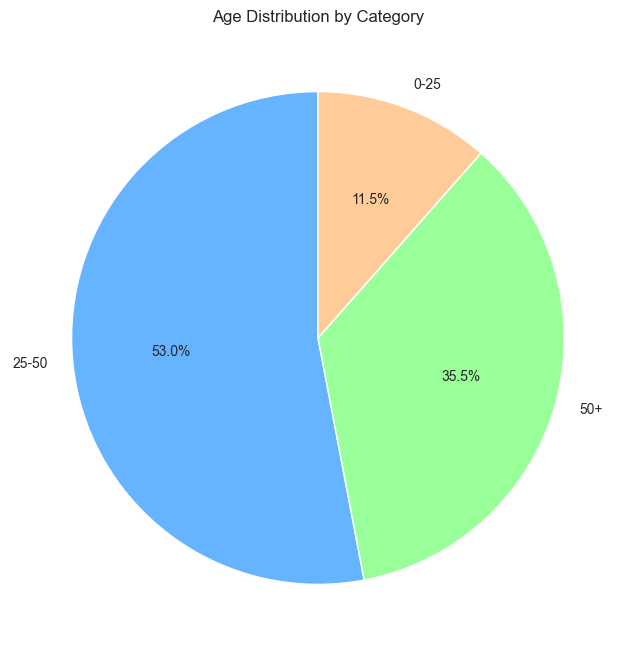

In [27]:
# 1. Create a pie chart of users' age distribution. 

### BEGIN SOLUTION
# Define age bins and labels
bins = [0, 25, 50, float('inf')]
labels = ['0-25', '25-50', '50+']

# Create a new column for age categories
data['AgeCategory'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Count the number of records in each category
age_category_counts = data['AgeCategory'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    age_category_counts,
    labels=age_category_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ffcc99']
)
plt.title('Age Distribution by Category')
plt.show()
### END SOLUTION

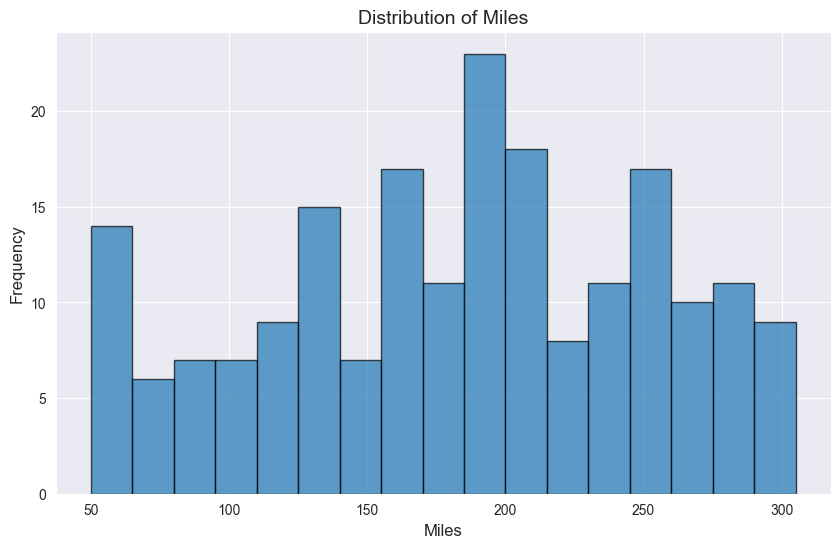

In [28]:
# 2. Create the distribution of miles.

### BEGIN SOLUTION
# Plot the frequency histogram of miles
plt.figure(figsize=(10, 6))

# Definition interval boundary
bins = [50, 65, 80, 95, 110, 125, 140, 155, 170, 185,  200, 215, 230, 245, 260, 275, 290, 305]

# Plot the histogram and set bins to the specified interval
plt.hist(data["Miles"], bins=bins, edgecolor="black", alpha=0.7)

# Set the title and label
plt.title("Distribution of Miles", fontsize=14)
plt.xlabel("Miles", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()
### END SOLUTION

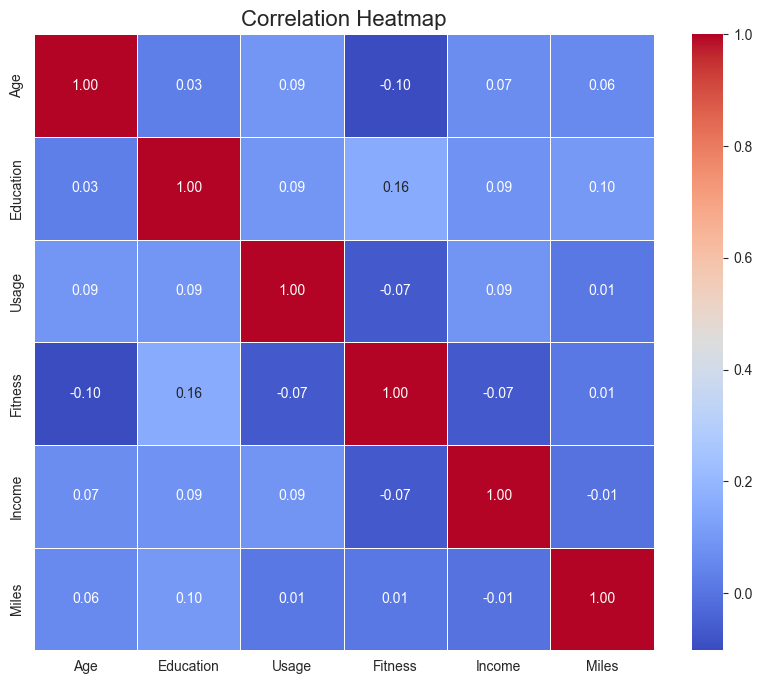

In [29]:
# 3. Draw heat map for all variables.

### BEGIN SOLUTION
# Select numeric features
numeric_columns = data.select_dtypes(include=["float64", "int64"]).columns

# Calculate the covariance matrix
correlation_matrix = data[numeric_columns].corr()

# Draw a covariance heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title 
plt.title("Correlation Heatmap", fontsize=16)

plt.show()
### END SOLUTION